## Importing Packages

In [ ]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

#Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#NLP
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Importing dataset using pandas

In [ ]:
dataset=pd.read_csv('/content/Phishing_Emaildata_By_Type.csv', index_col=False)
dataset

,Subject,Text,Type
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,from Mrs.Johnson,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,Co-Operation,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...,...
154,These Bags Just Arrived For Spring,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,POTUS Comes to Broadway this April! Get Ticket...,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,Let’s talk about Bridgerton!,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,MONDAY MIX: All eyes on Ukraine,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


## Data Evaluation

In [ ]:
print('Shape of Dataset:', dataset.shape)
print('Size of Dataset:', dataset.size)

Shape of Dataset: (159, 3)
Size of Dataset: 477


In [ ]:
dataset.describe()

,Subject,Text,Type
count,157,159,159
unique,157,159,4
top,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
freq,1,1,40


In [ ]:
print(dataset.isnull().sum())
print(dataset.duplicated().sum())

Subject    2
Text       0
Type       0
dtype: int64
0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  157 non-null    object
 1   Text     159 non-null    object
 2   Type     159 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [ ]:
dataset.drop(columns='Subject', inplace=True)
dataset

,Text,Type
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...
154,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


In [ ]:
dataset.rename(columns={'Type':'Target','Text':'Content'},inplace=True)
dataset

,Content,Target
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...
154,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


In [ ]:
dataset['Target'] = dataset['Target'].replace({'False Positives ': 'Safe Email','Commercial Spam':'Spam'})
# dataset = dataset[~dataset['Target'].isin(['Commercial Spam','Fraud'])]
dataset

,Content,Target
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...
154,Bags so perfect—you'll never want to be withou...,Spam
155,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Spam
156,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Spam
157,Hi!\n \nSpring forward with our newest noPac c...,Spam


## Label Encoding

In [ ]:
encoder = LabelEncoder()
dataset['Target'] = encoder.fit_transform(dataset['Target'])

In [ ]:
dataset['Target'].value_counts()

0    40
1    40
3    40
2    39
Name: Target, dtype: int64

## Exploratory Data Analysis

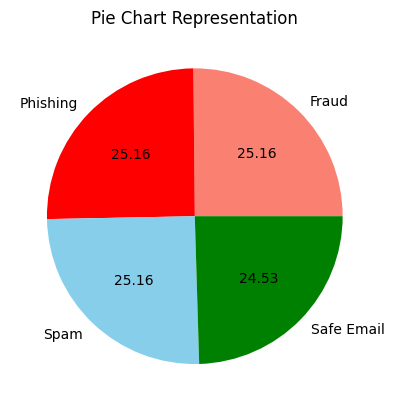

In [ ]:
dataset['Target'].value_counts()
plt.pie(dataset['Target'].value_counts(), labels=['Fraud','Phishing','Spam','Safe Email'],colors=['salmon','red','skyblue','green'],autopct="%0.2f")
plt.title('Pie Chart Representation')
plt.show()

Text(0.5, 1.0, 'Column Chart Presentation')

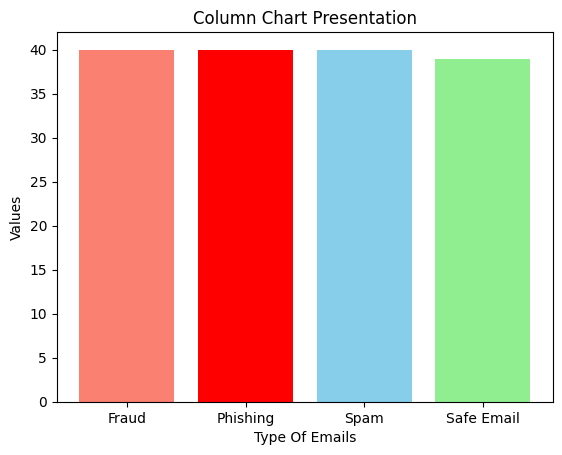

In [ ]:
labels=['Fraud','Phishing','Spam','Safe Email']
values=dataset['Target'].value_counts()
bar_color=['salmon','red','skyblue','lightgreen']

bars=plt.bar(labels, values, color=bar_color)

plt.xlabel('Type Of Emails')
plt.ylabel('Values')
plt.title('Column Chart Presentation')

# for bar, value in zip(bars, values):
#     plt.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, value),
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords="offset points",
#                  ha='center', fontsize=10)

In [ ]:
# Sample data
categories = ['Fraud','Phishing','Spam','Safe Email']
value = dataset['Target'].value_counts()

fig = px.bar(
    x=categories,
    y=values,
    labels={'x': 'Type Of Email', 'y': 'Values'},
    title='Interactive Bar Chart with Tooltips',
    color=categories
)

fig.update_traces(textposition='outside')

fig.show()


## Data Transformation

In [ ]:
dataset['char_count'] = dataset['Content'].apply(len)
dataset['word_count'] = dataset['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset['sentence_count'] = dataset['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))
dataset

,Content,Target,char_count,word_count,sentence_count
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,0,3280,633,15
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",0,3245,593,17
2,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,0,3254,618,24
3,Goodday Dear\n\n\nI know this mail will come t...,0,1951,350,1
4,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,0,3064,610,21
...,...,...,...,...,...
154,Bags so perfect—you'll never want to be withou...,3,2388,462,33
155,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,3,913,151,4
156,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,3,1067,200,15
157,Hi!\n \nSpring forward with our newest noPac c...,3,1733,303,11


<Axes: xlabel='char_count', ylabel='Count'>

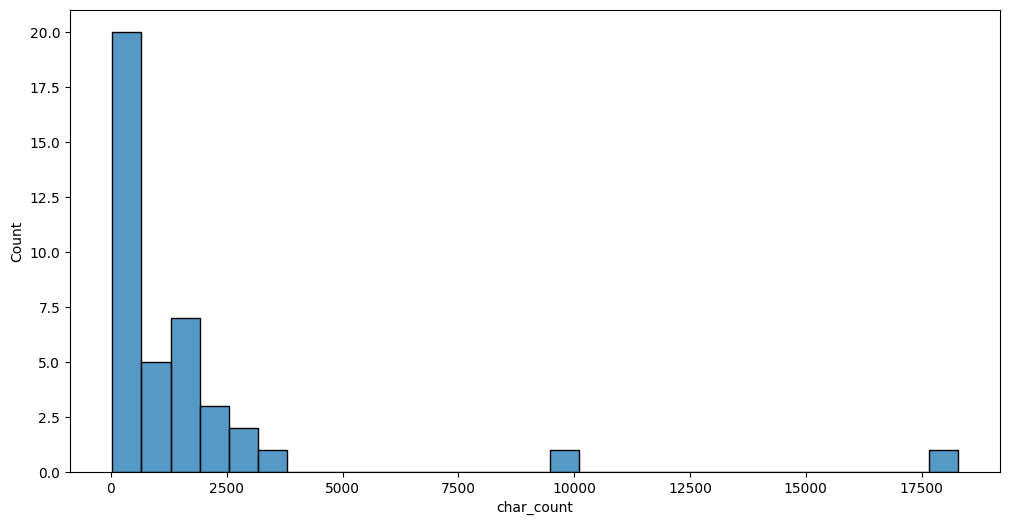

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 1]['char_count'])


<Axes: xlabel='char_count', ylabel='Count'>

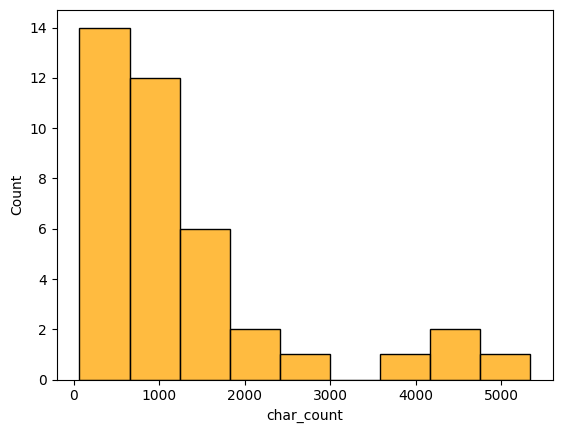

In [ ]:

sns.histplot(dataset[dataset['Target'] == 2]['char_count'], color='orange')

<Axes: xlabel='sentence_count', ylabel='Count'>

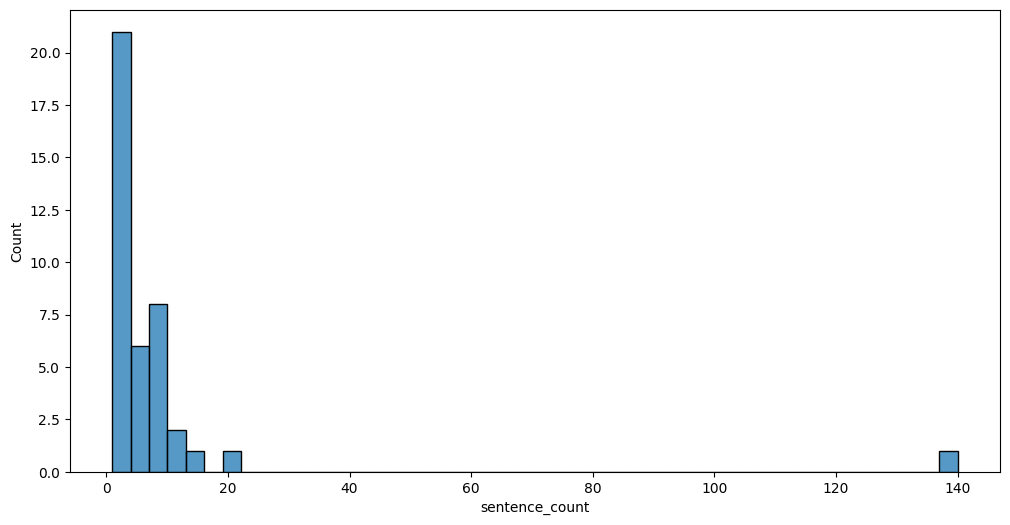

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 1]['sentence_count'])

<Axes: xlabel='sentence_count', ylabel='Count'>

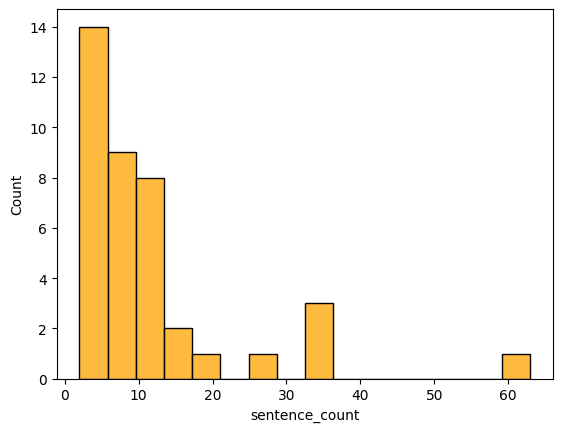

In [ ]:
sns.histplot(dataset[dataset['Target'] == 2]['sentence_count'], color='orange')

<Axes: xlabel='word_count', ylabel='Count'>

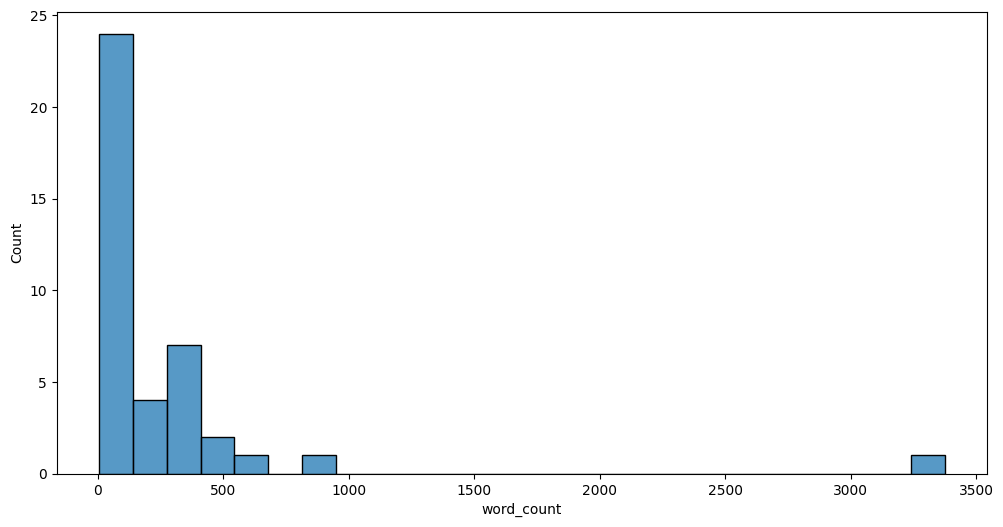

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 1]['word_count'])


<Axes: xlabel='word_count', ylabel='Count'>

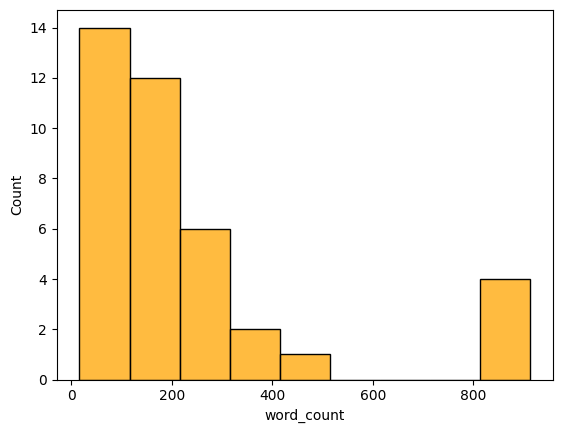

In [ ]:
sns.histplot(dataset[dataset['Target'] == 2]['word_count'], color='orange')

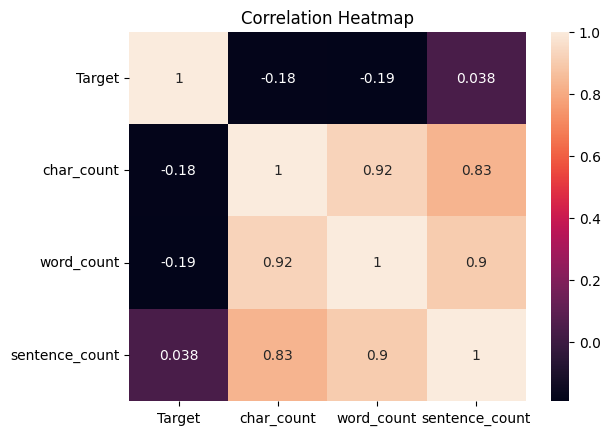

In [ ]:
subset_df=dataset[['Target','char_count','word_count','sentence_count']]
corr_matrix = subset_df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Text Preprocessing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from bs4 import BeautifulSoup
punc=["''","--","–","’"]
def text_transform(text):

  # Use BeautifulSoup to remove HTML tags
  text = BeautifulSoup(text, 'html.parser').get_text()

  #converting text to lowercase
  text = text.lower()

  #Tokenizing the text into word
  words = nltk.word_tokenize(text)

  # Remove stopwords and punctuation and special characters
  stop_words = set(stopwords.words('english'))
  transformed_words = [word for word in words if word not in stop_words and word not in string.punctuation and word not in punc]

  transformed_text = ' '.join([word for word in transformed_words if word]).strip()

  return transformed_text

In [ ]:
dataset['Transformed_Content'] = dataset['Content'].apply(text_transform)

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

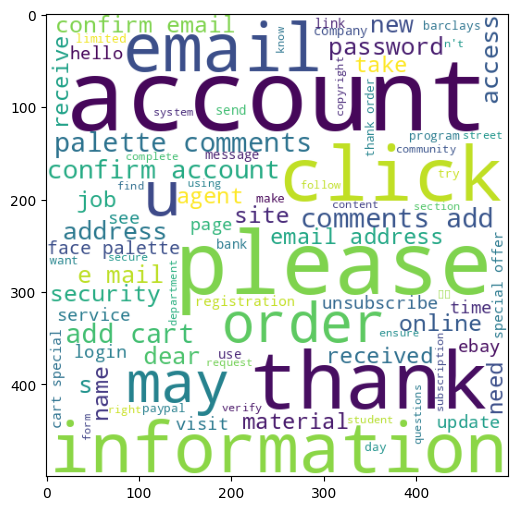

In [ ]:
phishing_wc = wc.generate(dataset[dataset['Target'] == 1]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(phishing_wc)

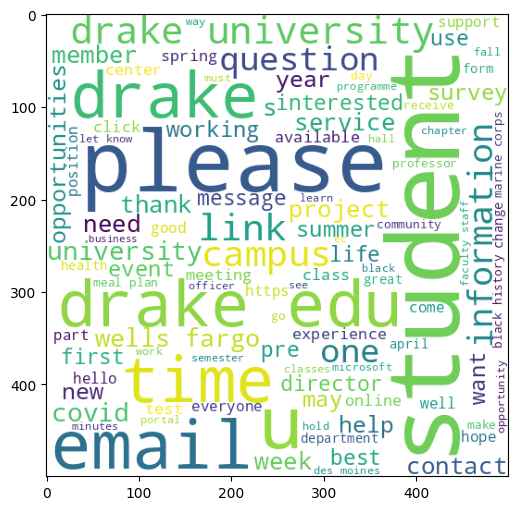

In [ ]:
safeemail_wc = wc.generate(dataset[dataset['Target'] == 2]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(safeemail_wc)

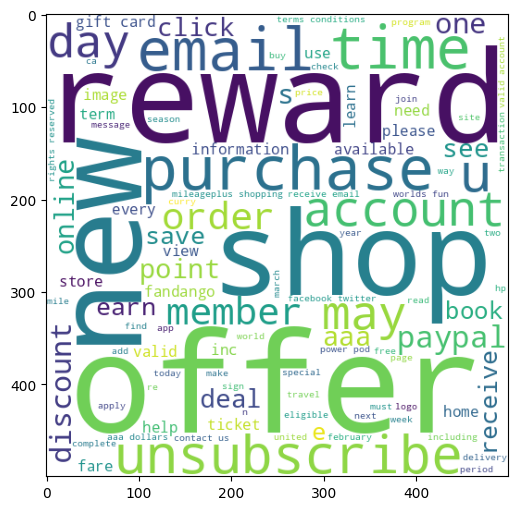

In [ ]:
spam_wc = wc.generate(dataset[dataset['Target'] == 3]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

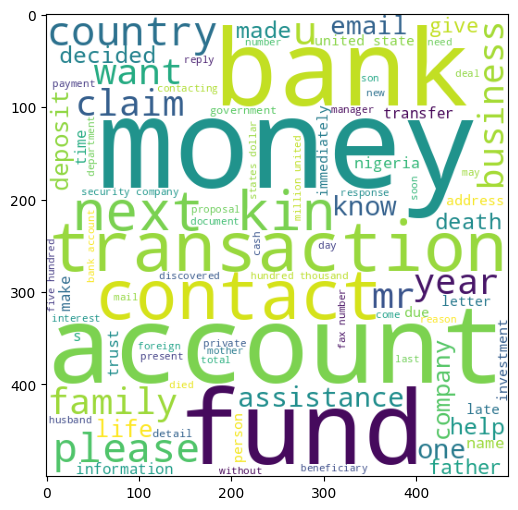

In [ ]:
fraud_wc = wc.generate(dataset[dataset['Target'] == 0]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
phishing_corpus = []
for msg in dataset[dataset['Target'] == 1]['Transformed_Content'].tolist():
    for word in msg.split():
        phishing_corpus.append(word)
len(phishing_corpus)

4688

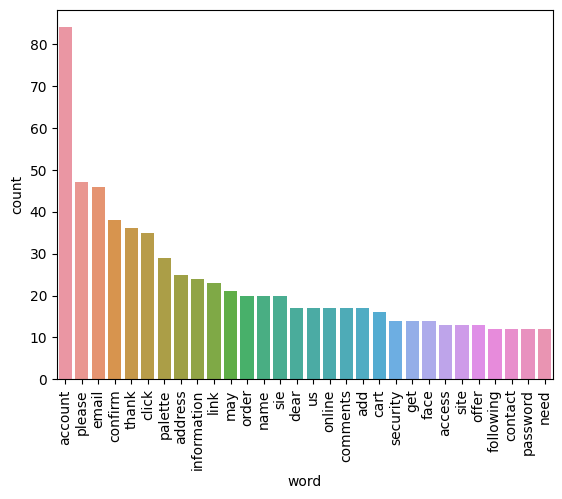

In [ ]:
from collections import Counter

data1 = pd.DataFrame(Counter(phishing_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
safeemail_corpus = []
for msg in dataset[dataset['Target'] == 2]['Transformed_Content'].tolist():
    for word in msg.split():
        safeemail_corpus.append(word)
len(safeemail_corpus)

4518

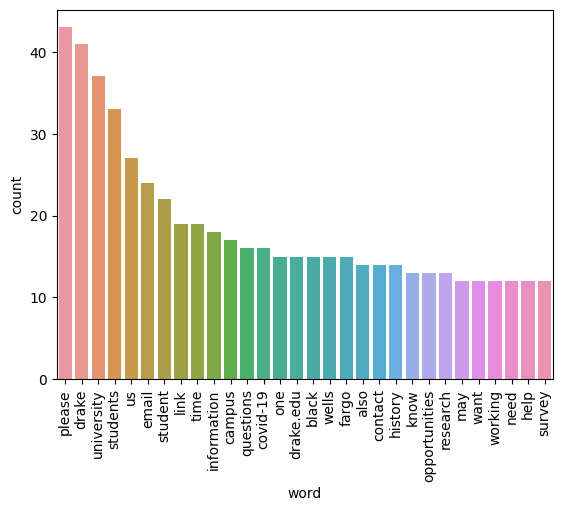

In [ ]:
data2 = pd.DataFrame(Counter(safeemail_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data2)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
spam_corpus = []
for msg in dataset[dataset['Target'] == 3]['Transformed_Content'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

7585

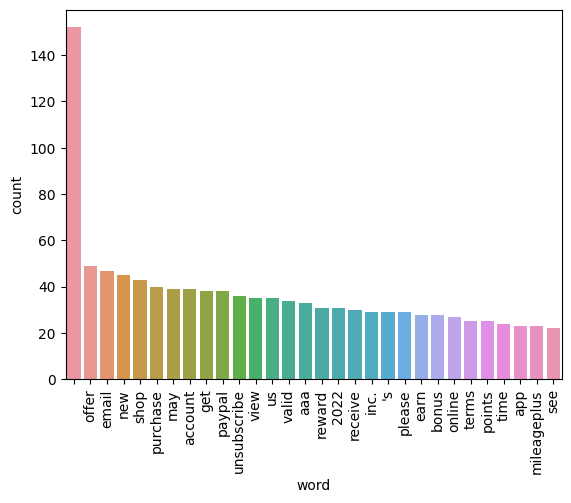

In [ ]:
data3 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data3)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
fraud_corpus = []
for msg in dataset[dataset['Target'] == 0]['Transformed_Content'].tolist():
    for word in msg.split():
        fraud_corpus.append(word)
len(fraud_corpus)

9314

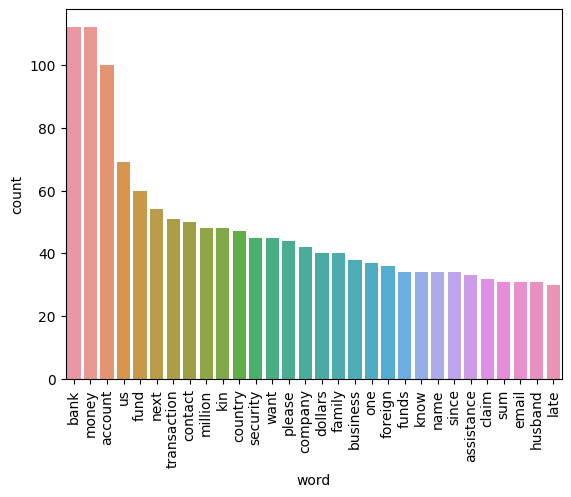

In [ ]:
data4 = pd.DataFrame(Counter(fraud_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data4)
plt.xticks(rotation='vertical')
plt.show()